In [41]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

# Data Analysis

In [2]:
with open('./data/all_games.json') as f:
    data = json.load(f)

In [3]:
# Convert JSON to DataFrame
game_df = pd.DataFrame(data)

# List of desired columns in pattern detection
columns_to_keep = [
    'id', 'category', 'first_release_date', 'platforms', 'genres', 'game_modes', 'player_perspectives',
    'themes', 'language_supports', 'age_ratings', 'follows', 'aggregated_rating',
    'aggregated_rating_count', 'rating', 'rating_count', 'total_rating', 'total_rating_count', 
    'dlcs', 'game_localizations', 'multiplayer_modes'
]

# Subset the DataFrame
games_df = game_df[columns_to_keep]

# For these columns, we regard na as N
columns_to_fill = ['dlcs', 'game_localizations', 'multiplayer_modes']
games_df[columns_to_fill] = games_df[columns_to_fill].fillna(0)

num_features = games_df.shape[1] - 1

# Calculate the number of missing values for each game
games_df['missing_count'] = games_df.isnull().sum(axis=1)

<ipython-input-3-de88653fbb09>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df[columns_to_fill] = games_df[columns_to_fill].fillna(0)
<ipython-input-3-de88653fbb09>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['missing_count'] = games_df.isnull().sum(axis=1)


In [4]:
games_df.head()

id  category  first_release_date platforms genres game_modes  \
0  257528         5        1.262218e+09       [6]    NaN        NaN   
1  257527         0        1.689552e+09       [6]   [34]        NaN   
2  257523         0        1.656979e+09       [6]   [34]        NaN   
3  257522         0        1.656979e+09       [6]   [34]        NaN   
4  257519         0                 NaN       [6]   [34]        NaN   

  player_perspectives themes language_supports age_ratings  ...  \
0                 NaN    NaN               NaN         NaN  ...   
1                 NaN    NaN               NaN         NaN  ...   
2                 NaN    NaN               NaN         NaN  ...   
3                 NaN    NaN               NaN         NaN  ...   
4                 NaN    NaN               NaN         NaN  ...   

   aggregated_rating  aggregated_rating_count  rating  rating_count  \
0                NaN                      NaN     NaN           NaN   
1                NaN                      NaN     NaN           NaN   
2                NaN                      NaN     NaN           NaN   
3                NaN                      NaN     NaN           NaN   
4                NaN                      NaN     NaN           NaN   

   total_rating  total_rating_count  dlcs game_localizations  \
0           NaN                 NaN     0                  0   
1           NaN                 NaN     0                  0   
2           NaN                 NaN     0                  0   
3           NaN                 NaN     0                  0   
4           NaN                 NaN     0                  0   

  multiplayer_modes missing_count  
0                 0            13  
1                 0            12  
2                 0            12  
3                 0            12  
4                 0            13  

[5 rows x 21 columns]

<ipython-input-5-478bc1cd51fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['missing_percentage'] = (games_df['missing_count'] / num_features) * 100


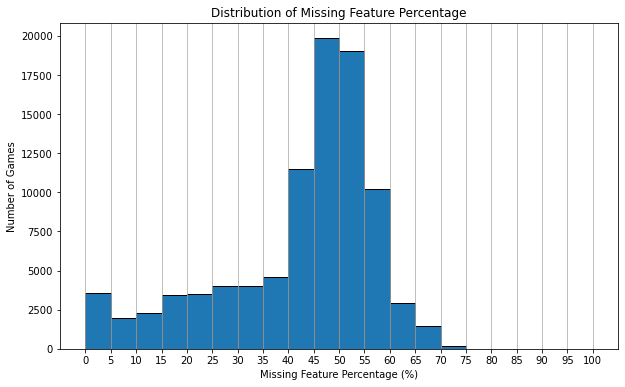

In [5]:
# Calculate the missing feature percentage for each game
games_df['missing_percentage'] = (games_df['missing_count'] / num_features) * 100

In [22]:
data = games_df['missing_percentage']

# Define the color for the histogram bars
bar_color = 'rgb(130,176,210)'

# Create a histogram
fig = go.Figure(data=[go.Histogram(
    x=data,
    xbins=dict(start=0, end=100, size=5),
    marker=dict(color=bar_color),
)])

# Update layout with requested style adjustments
fig.update_layout(
    title_text="Distribution of Missing Feature Percentage",
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    # height=500, 
    # width=800,
    bargap=0.1,
)

# Update x-axis and y-axis settings
fig.update_xaxes(
    title_text="Missing Feature Percentage (%)",
    title_standoff=0,
    title_font=dict(size=16),
    linecolor='black',
    linewidth=2,
    tickvals=[i for i in range(0, 105, 5)],
)

fig.update_yaxes(
    title_text="Number of Games",
    gridcolor='lightgray',
    linecolor='black',
    linewidth=2,
    title_standoff=8,
    title_font=dict(size=16),
)

# Show the figure
fig.show()

In [21]:
missing_percentage_column = games_df.isnull().mean() * 100
missing_percentage_column.sort_values(ascending=True, inplace=True)

columns = missing_percentage_column.index
percent_missing = missing_percentage_column.values

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=percent_missing,
    y=columns,
    orientation='h',
    marker=dict(color='rgb(130,176,210)'),
)])

# Update layout for enhanced readability and style
fig.update_layout(
    title_text='Percentage of Missing Values by Column',
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Percentage of Missing Values (%)',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray',
    ),
    yaxis=dict(
        title='Column Name',
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray',
        title_font=dict(size=16),
    ),
)

# Show the plot
fig.show()

In [23]:
# If a game doesn't have any ratings, it might not be very popular
has_rating_df = games_df[games_df['total_rating_count'].notna()]

data = has_rating_df['missing_percentage']

# Create a histogram
fig = go.Figure(data=[go.Histogram(
    x=data,
    xbins=dict(start=0, end=100, size=5),
    marker=dict(color=bar_color),
)])

# Update layout with requested style adjustments
fig.update_layout(
    title_text="Distribution of Missing Feature Percentage for Games with Ratings",
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    bargap=0.1,
)

# Update x-axis and y-axis settings
fig.update_xaxes(
    title_text="Missing Feature Percentage (%)",
    title_standoff=0,
    title_font=dict(size=16),
    linecolor='black',
    linewidth=2,
    tickvals=[i for i in range(0, 105, 5)], 
)

fig.update_yaxes(
    title_text="Number of Games",
    gridcolor='lightgray',
    linecolor='black',
    linewidth=2,
    title_standoff=8,
    title_font=dict(size=16),
)

# Show the figure
fig.show()

In [24]:
missing_percentage_column = has_rating_df.isnull().mean() * 100
missing_percentage_column.sort_values(ascending=True, inplace=True)

columns = missing_percentage_column.index
percent_missing = missing_percentage_column.values

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=percent_missing,
    y=columns,
    orientation='h',
    marker=dict(color='rgb(130,176,210)'),
)])

# Update layout for enhanced readability and style
fig.update_layout(
    title_text='Percentage of Missing Values by Column',
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Percentage of Missing Values (%)',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray',
    ),
    yaxis=dict(
        title='Column Name',
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray',
        title_font=dict(size=16),
    ),
)

# Show the plot
fig.show()

In [25]:
missing_percentage = has_rating_df.isnull().mean() * 100
print(missing_percentage)

id                          0.000000
category                    0.000000
first_release_date          0.100696
platforms                   0.000000
genres                      1.339696
game_modes                  1.738103
player_perspectives        43.715249
themes                     24.153934
language_supports          17.000131
age_ratings                49.214132
follows                    53.128147
aggregated_rating          60.549013
aggregated_rating_count    60.549013
rating                     10.192198
rating_count               10.192198
total_rating                0.000000
total_rating_count          0.000000
dlcs                        0.000000
game_localizations          0.000000
multiplayer_modes           0.000000
missing_count               0.000000
missing_percentage          0.000000
dtype: float64


In [8]:
# # Filter games with <= 50% missing values
# filtered_games = has_rating_df[has_rating_df['missing_percentage'] <= 50]

# game_ids = filtered_games['id'].tolist()

# print(len(game_ids))

22823
22881


# Classification (Games and ratings)

In [ ]:
df1 = pd.read_csv('./data/processed_data.csv')
mask = pd.read_csv('./data/mask.csv')

In [ ]:
# Remove games that don't have any ratings
ids_to_remove = mask[mask['total_rating'] == False]['id']
df1_filtered = df1[~df1['id'].isin(ids_to_remove)]

In [ ]:
print(df1_filtered.columns.to_list())
print(len(df1_filtered.columns.to_list()))

['id', 'category', 'multiplayer_modes_offlinecoop', 'multiplayer_modes_onlinecoop', 'game_localizations_2', 'game_localizations_3', 'game_localizations_4', 'total_platforms_support', 'dlcs', 'first_release_date_year', 'first_release_date_month', 'first_release_date_day', 'genres_2', 'genres_4', 'genres_5', 'genres_7', 'genres_8', 'genres_9', 'genres_10', 'genres_11', 'genres_12', 'genres_13', 'genres_14', 'genres_15', 'genres_16', 'genres_24', 'genres_25', 'genres_26', 'genres_30', 'genres_31', 'genres_32', 'genres_33', 'genres_34', 'genres_35', 'genres_36', 'themes_1', 'themes_17', 'themes_18', 'themes_19', 'themes_20', 'themes_21', 'themes_22', 'themes_23', 'themes_27', 'themes_28', 'themes_31', 'themes_32', 'themes_33', 'themes_34', 'themes_35', 'themes_38', 'themes_39', 'themes_40', 'themes_41', 'themes_42', 'themes_43', 'themes_44', 'player_perspectives_1', 'player_perspectives_2', 'player_perspectives_3', 'player_perspectives_4', 'player_perspectives_5', 'player_perspectives_6', 

In [ ]:
columns_to_remove = ['id', 'aggregated_rating', 'aggregated_rating_count', 'rating', 'rating_count', 'total_rating_count']
rating_all = df1_filtered.drop(columns=columns_to_remove)

In [ ]:
print(rating_all.columns.to_list())
print(len(rating_all.columns.to_list()))

['category', 'multiplayer_modes_offlinecoop', 'multiplayer_modes_onlinecoop', 'game_localizations_2', 'game_localizations_3', 'game_localizations_4', 'total_platforms_support', 'dlcs', 'first_release_date_year', 'first_release_date_month', 'first_release_date_day', 'genres_2', 'genres_4', 'genres_5', 'genres_7', 'genres_8', 'genres_9', 'genres_10', 'genres_11', 'genres_12', 'genres_13', 'genres_14', 'genres_15', 'genres_16', 'genres_24', 'genres_25', 'genres_26', 'genres_30', 'genres_31', 'genres_32', 'genres_33', 'genres_34', 'genres_35', 'genres_36', 'themes_1', 'themes_17', 'themes_18', 'themes_19', 'themes_20', 'themes_21', 'themes_22', 'themes_23', 'themes_27', 'themes_28', 'themes_31', 'themes_32', 'themes_33', 'themes_34', 'themes_35', 'themes_38', 'themes_39', 'themes_40', 'themes_41', 'themes_42', 'themes_43', 'themes_44', 'player_perspectives_1', 'player_perspectives_2', 'player_perspectives_3', 'player_perspectives_4', 'player_perspectives_5', 'player_perspectives_6', 'playe

In [ ]:
rating_all.to_csv('./data/rating_all.csv', index=False)

In [98]:
rating_all = pd.read_csv('./data/rating_all.csv')

In [99]:
rating_all['normalized_rating_0_100'] = rating_all['total_rating'] * 100

bins = np.linspace(0, 100, 21)  # Creates 20 bins from 0 to 100

# Plotly Histogram
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=rating_all['normalized_rating_0_100'],
    xbins=dict(
        start=0,
        end=100,
        size=5
    ),
    marker_color='rgb(130,176,210)'
))

fig.update_layout(
    title_text='Distribution of Total Rating (Normalized 0-100)',
    xaxis=dict(
        title='Normalized Rating',
        linecolor='black',
        linewidth=2,
    ),
    yaxis=dict(
        title='Count',
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray'
    ),
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    bargap=0.2,
)

fig.show()

In [100]:
bins = [i/20 for i in range(21)]  # Creates 20 bins
labels = [f'{i*5}-{i*5 + 4}' for i in range(20)]

# Categorize normalized ratings into classes
rating_all['rating_class'] = pd.cut(rating_all['total_rating'], bins=bins, labels=labels, right=False)

# Check the distribution of categories
category_counts = rating_all['rating_class'].value_counts().sort_index()

# # Visualize the distribution of Total Rating Classes on the normalized scale
# fig = go.Figure(data=[go.Bar(
#     x=category_counts.index, 
#     y=category_counts.values, 
#     marker=dict(color='rgb(130,176,210)')
# )])

# fig.update_layout(
#     title_text='Distribution of Total Rating Classes (Normalized 0-1)',
#     xaxis=dict(
#         title='Rating Class',
#         linecolor='black',
#         linewidth=2,
#         gridcolor='lightgray'
#     ),
#     yaxis=dict(
#         title='Count',
#         linecolor='black',
#         linewidth=2,
#         gridcolor='lightgray'
#     ),
#     font=dict(family="Helvetica", size=12),
#     plot_bgcolor='white',
#     paper_bgcolor='white',
# )

# fig.show()

print(category_counts)

rating_class
0-4        15
5-9         0
10-14      21
15-19       3
20-24      84
25-29      31
30-34     278
35-39     120
40-44     954
45-49     288
50-54    3487
55-59     665
60-64    2972
65-69    1510
70-74    6375
75-79    2134
80-84    2741
85-89     755
90-94     337
95-99      57
Name: count, dtype: int64


In [101]:
def categorize_rating(rating):
    if rating >= 0 and rating <= 65:
        return 2
    elif rating > 65 and rating <= 75:
        return 1
    elif rating > 75 and rating <= 100:
        return 0
    else:
        return np.nan

rating_all['total_rating_3'] = rating_all['normalized_rating_0_100'].apply(categorize_rating)
rating_all['total_rating_3'] = rating_all['total_rating_3'].astype(int)

In [103]:
category_counts = rating_all['total_rating_3'].value_counts().sort_index()

fig = go.Figure(data=[
    go.Bar(
        x=category_counts.index, 
        y=category_counts.values, 
        marker_color='rgb(130,176,210)'
    )
])

fig.update_layout(
    title_text='Distribution of Ratings by Category',
    xaxis=dict(
        title='Rating Category',
        linecolor='black',
        linewidth=2,
        tickmode='array',
        tickvals=[0, 1, 2],
        ticktext=['75-100', '65-75', '0-65']
    ),
    yaxis=dict(
        title='Count',
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray'
    ),
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    bargap=0.75,
)

fig.show()

In [ ]:
print(rating_all.columns.to_list())

['category', 'multiplayer_modes_offlinecoop', 'multiplayer_modes_onlinecoop', 'game_localizations_2', 'game_localizations_3', 'game_localizations_4', 'total_platforms_support', 'dlcs', 'first_release_date_year', 'first_release_date_month', 'first_release_date_day', 'genres_2', 'genres_4', 'genres_5', 'genres_7', 'genres_8', 'genres_9', 'genres_10', 'genres_11', 'genres_12', 'genres_13', 'genres_14', 'genres_15', 'genres_16', 'genres_24', 'genres_25', 'genres_26', 'genres_30', 'genres_31', 'genres_32', 'genres_33', 'genres_34', 'genres_35', 'genres_36', 'themes_1', 'themes_17', 'themes_18', 'themes_19', 'themes_20', 'themes_21', 'themes_22', 'themes_23', 'themes_27', 'themes_28', 'themes_31', 'themes_32', 'themes_33', 'themes_34', 'themes_35', 'themes_38', 'themes_39', 'themes_40', 'themes_41', 'themes_42', 'themes_43', 'themes_44', 'player_perspectives_1', 'player_perspectives_2', 'player_perspectives_3', 'player_perspectives_4', 'player_perspectives_5', 'player_perspectives_6', 'playe

In [ ]:
columns_to_remove = ['total_rating', 'normalized_rating_0_100', 'rating_class']
rating_pred = rating_all.drop(columns=columns_to_remove)

In [ ]:
print(rating_pred.columns.to_list())

['category', 'multiplayer_modes_offlinecoop', 'multiplayer_modes_onlinecoop', 'game_localizations_2', 'game_localizations_3', 'game_localizations_4', 'total_platforms_support', 'dlcs', 'first_release_date_year', 'first_release_date_month', 'first_release_date_day', 'genres_2', 'genres_4', 'genres_5', 'genres_7', 'genres_8', 'genres_9', 'genres_10', 'genres_11', 'genres_12', 'genres_13', 'genres_14', 'genres_15', 'genres_16', 'genres_24', 'genres_25', 'genres_26', 'genres_30', 'genres_31', 'genres_32', 'genres_33', 'genres_34', 'genres_35', 'genres_36', 'themes_1', 'themes_17', 'themes_18', 'themes_19', 'themes_20', 'themes_21', 'themes_22', 'themes_23', 'themes_27', 'themes_28', 'themes_31', 'themes_32', 'themes_33', 'themes_34', 'themes_35', 'themes_38', 'themes_39', 'themes_40', 'themes_41', 'themes_42', 'themes_43', 'themes_44', 'player_perspectives_1', 'player_perspectives_2', 'player_perspectives_3', 'player_perspectives_4', 'player_perspectives_5', 'player_perspectives_6', 'playe

In [ ]:
rating_pred.to_csv('./data/rating_pred.csv', index=False)

## Split Data

In [90]:
rating_pred = pd.read_csv('./data/rating_pred.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [91]:
# Split data
y_c = rating_pred['total_rating_3']
X_c = rating_pred.drop('total_rating_3', axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

In [113]:
X_train_c.shape

(18272, 75)

## Correlation

In [109]:
# Combine features and target into one DataFrame
data_c = pd.concat([X_train_c, y_train_c], axis=1)

# Calculate correlations
correlations = data_c.corr()

# Identify top 15 negative and positive correlated features with the target
target_name = y_train_c.name
target_correlations = correlations[target_name].drop(target_name)
top_neg_corr = target_correlations.nsmallest(10)
top_pos_corr = target_correlations.nlargest(10)

print('\nMost Negative Correlations:\n', top_neg_corr)
print('\nMost Positive Correlations:\n', top_pos_corr)


Most Negative Correlations:
 total_platforms_support          -0.231535
game_localizations_2             -0.189744
category                         -0.188105
follows                          -0.186818
game_localizations_3             -0.164236
unique_language_support_type_3   -0.136824
total_language_support           -0.134114
unique_language_support_type_2   -0.104890
dlcs                             -0.087950
unique_language_support_type_1   -0.077695
Name: total_rating_3, dtype: float64

Most Positive Correlations:
 player_perspectives_6    0.275039
player_perspectives_7    0.243859
player_perspectives_5    0.220673
themes_42                0.155905
genres_32                0.133618
themes_34                0.132538
themes_41                0.132304
themes_40                0.130115
themes_28                0.129867
themes_44                0.129703
Name: total_rating_3, dtype: float64


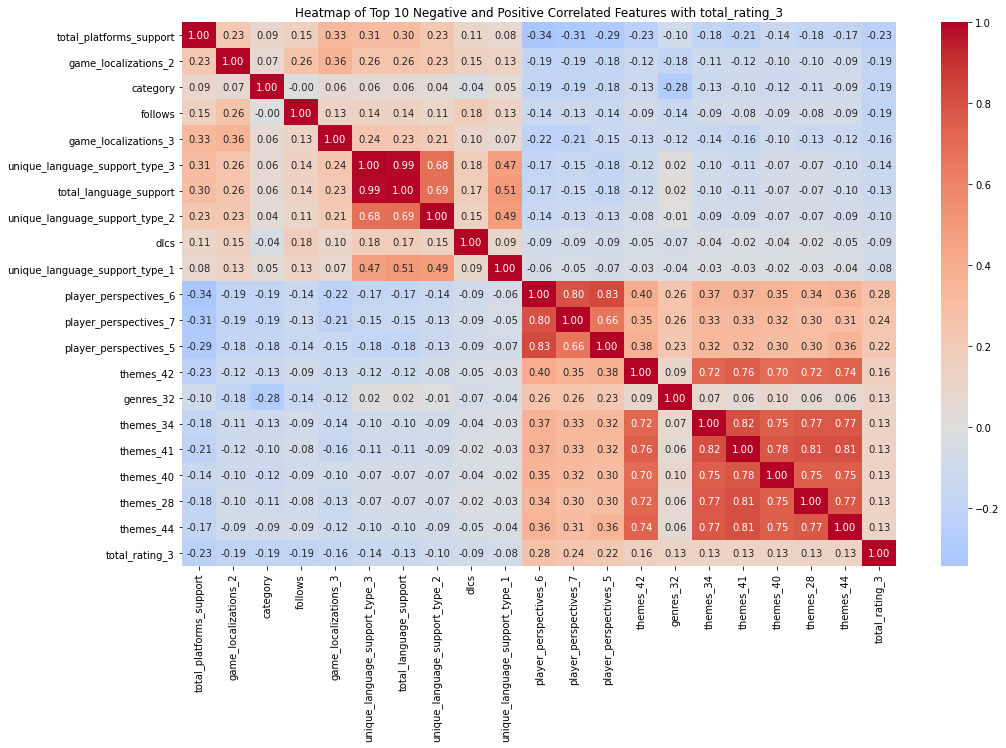

In [ ]:
# Combine top negative and positive correlations for the heatmap
top_corr_features = top_neg_corr.index.tolist() + top_pos_corr.index.tolist() + [target_name]

plt.figure(figsize=(16, 10))
sns.heatmap(data_c[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title(f'Heatmap of Top 10 Negative and Positive Correlated Features with {target_name}')
plt.show()

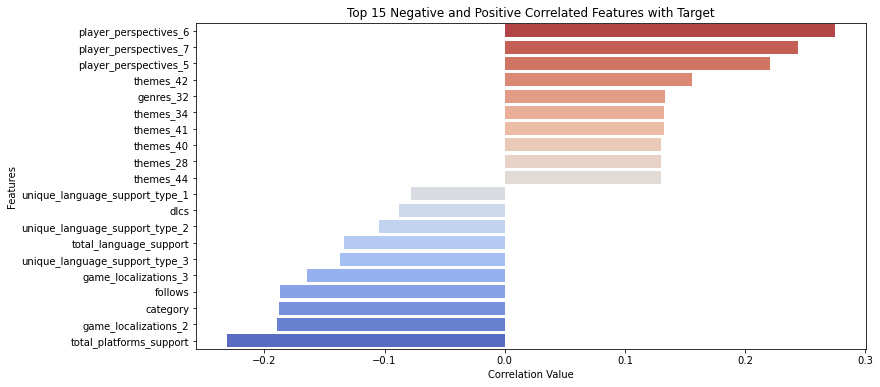

In [ ]:
# Sort the 'top_corr' Series from most positive to most negative
top_corr = pd.concat([top_pos_corr, top_neg_corr]).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_corr.index, x=top_corr.values, orient='h', palette="coolwarm_r")
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.title('Top 15 Negative and Positive Correlated Features with Target')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, classification_report, make_scorer, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

f1_scorer = make_scorer(f1_score, average='weighted')

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train_c, y_train_c)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters:", best_params_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.7min finished


Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
# Use the best parameters to create a new model
final_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the model on the combined training and validation set
final_rf.fit(X_train_c, y_train_c)

# Predictions on the test set
predictions_rf = final_rf.predict(X_test_c)

In [ ]:
# Calculate feature importances
feature_importances_rf = final_rf.feature_importances_
features = X_train_c.columns

fi_df = pd.DataFrame({'feature': features, 'importance': feature_importances_rf})
fi_df.sort_values(by='importance', ascending=True, inplace=True)
top_15_features = fi_df.tail(15)

# Visualization
fig = go.Figure(data=[go.Bar(
    x=top_15_features['importance'],
    y=top_15_features['feature'],
    orientation='h',
    marker=dict(color='rgb(130,176,210)'),
)])

fig.update_layout(
    title_text='Top 15 Feature Importances in Random Forest Model',
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Importance',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray', 
    ),
    yaxis=dict(
        title='Feature',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
    ),
    showlegend=False,
)

fig.show()

In [ ]:
# Performance on Test Set
f1_rf = f1_score(y_test_c, predictions_rf, average='weighted')
accuracy_rf = accuracy_score(y_test_c, predictions_rf)

# Converting labels for ROC AUC calculation
lb = LabelBinarizer()
y_test_c_lb = lb.fit_transform(y_test_c)
predictions_rf_lb = lb.transform(predictions_rf)
roc_auc_rf = roc_auc_score(y_test_c_lb, predictions_rf_lb, average='weighted', multi_class='ovr')

print(f'F1 Score: {f1_rf:.4f}')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')

# Classification report
print(classification_report(y_test_c, predictions_rf))

F1 Score: 0.5334
Accuracy: 0.5386
ROC AUC Score: 0.6437
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1163
           1       0.48      0.42      0.45      1583
           2       0.58      0.68      0.62      1823

    accuracy                           0.54      4569
   macro avg       0.53      0.53      0.53      4569
weighted avg       0.53      0.54      0.53      4569



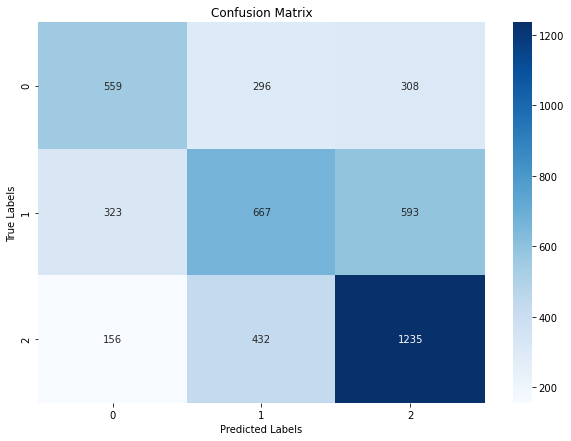

In [ ]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_c, predictions_rf)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### New

In [93]:
param_grid_new = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_new = RandomForestClassifier(random_state=42)

f1_scorer = make_scorer(f1_score, average='weighted')

# Instantiate the grid search model
grid_search_rf_new = GridSearchCV(estimator=rf_new, param_grid=param_grid_new, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf_new.fit(X_train_c, y_train_c)

# Get the best parameters
best_params_rf_new = grid_search_rf_new.best_params_
print("Best parameters:", best_params_rf_new)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 41.3min finished


Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [104]:
# Use the best parameters to create a new model
final_rf_new = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the model on the combined training and validation set
final_rf_new.fit(X_train_c, y_train_c)

# Predictions on the test set
predictions_rf_new = final_rf_new.predict(X_test_c)

In [105]:
# Calculate feature importances
feature_importances_rf_new = final_rf_new.feature_importances_
features_new = X_train_c.columns

fi_df_new = pd.DataFrame({'feature': features_new, 'importance': feature_importances_rf_new})
fi_df_new.sort_values(by='importance', ascending=True, inplace=True)
top_15_features_new = fi_df_new.tail(15)

# Visualization
fig = go.Figure(data=[go.Bar(
    x=top_15_features_new['importance'],
    y=top_15_features_new['feature'],
    orientation='h',
    marker=dict(color='rgb(130,176,210)'),
)])

fig.update_layout(
    title_text='Top 15 Feature Importances in Random Forest Model',
    title_font_size=20,
    font=dict(family="Helvetica", size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Importance',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
        gridcolor='lightgray', 
    ),
    yaxis=dict(
        title='Feature',
        title_font=dict(size=16),
        linecolor='black',
        linewidth=2,
    ),
    showlegend=False,
)

fig.show()

In [110]:
top_15_features_new

feature  importance
29                       genres_32    0.014583
28                       genres_31    0.014778
62           player_perspectives_7    0.015243
20                       genres_13    0.015344
0                         category    0.018110
73                     age_ratings    0.020362
70  unique_language_support_type_1    0.030071
69          total_language_support    0.037115
72  unique_language_support_type_3    0.037403
71  unique_language_support_type_2    0.037800
6          total_platforms_support    0.046720
9         first_release_date_month    0.056006
10          first_release_date_day    0.067341
74                         follows    0.088187
8          first_release_date_year    0.100275

In [106]:
# Performance on Test Set
f1_rf_new = f1_score(y_test_c, predictions_rf_new, average='weighted')
accuracy_rf_new = accuracy_score(y_test_c, predictions_rf_new)

# Converting labels for ROC AUC calculation
lb = LabelBinarizer()
y_test_c_lb = lb.fit_transform(y_test_c)
predictions_rf_lb_new = lb.transform(predictions_rf_new)
roc_auc_rf_new = roc_auc_score(y_test_c_lb, predictions_rf_lb_new, average='weighted', multi_class='ovr')

print(f'F1 Score: {f1_rf_new:.4f}')
print(f'Accuracy: {accuracy_rf_new:.4f}')
print(f'ROC AUC Score: {roc_auc_rf_new:.4f}')

# Classification report
print(classification_report(y_test_c, predictions_rf_new))

F1 Score: 0.5334
Accuracy: 0.5386
ROC AUC Score: 0.6437
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1163
           1       0.48      0.42      0.45      1583
           2       0.58      0.68      0.62      1823

    accuracy                           0.54      4569
   macro avg       0.53      0.53      0.53      4569
weighted avg       0.53      0.54      0.53      4569



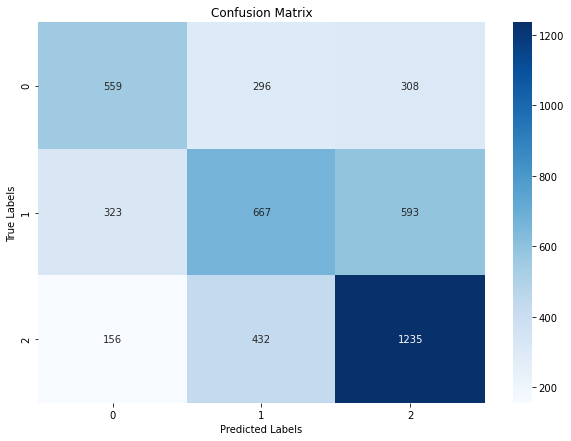

In [107]:
# Calculate the confusion matrix
cm_rf_new = confusion_matrix(y_test_c, predictions_rf_new)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_new, annot=True, fmt="d", cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [108]:
cm_rf_new

array([[ 559,  296,  308],
       [ 323,  667,  593],
       [ 156,  432, 1235]], dtype=int64)

## xgboost

In [ ]:
from xgboost import XGBClassifier

In [86]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 5],
    'learning_rate': [0.01, 0.1]
}


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

f1_scorer = make_scorer(f1_score, average='weighted')

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_c, y_train_c)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)

d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 106.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 162.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 217.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 307.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 532.2min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 686.2min finished


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.8}


In [87]:
# Use the best parameters to create a new model
final_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training set
final_xgb.fit(X_train_c, y_train_c)

# Predictions on the test set
predictions_xgb = final_xgb.predict(X_test_c)

d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [94]:
# Performance metrics
f1_xgb = f1_score(y_test_c, predictions_xgb, average='weighted')
accuracy_xgb = accuracy_score(y_test_c, predictions_xgb)
roc_auc_xgb = roc_auc_score(y_test_c_lb, lb.transform(predictions_xgb), average='weighted', multi_class='ovr')

print(f'F1 Score for XGBoost: {f1_xgb:.4f}')
print(f'Accuracy for XGBoost: {accuracy_xgb:.4f}')
print(f'ROC AUC Score for XGBoost: {roc_auc_xgb:.4f}')

# Classification report
print(classification_report(y_test_c, predictions_xgb))

F1 Score for XGBoost: 0.5408
Accuracy for XGBoost: 0.5448
ROC AUC Score for XGBoost: 0.6487
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1163
           1       0.49      0.45      0.47      1583
           2       0.58      0.67      0.62      1823

    accuracy                           0.54      4569
   macro avg       0.54      0.53      0.53      4569
weighted avg       0.54      0.54      0.54      4569



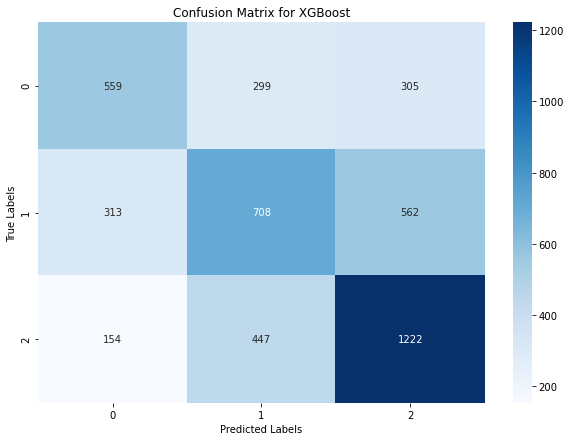

In [95]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test_c, predictions_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [112]:
cm_xgb

array([[ 559,  299,  305],
       [ 313,  708,  562],
       [ 154,  447, 1222]], dtype=int64)